<a href="https://colab.research.google.com/github/stutis28/Machine-Learning-Practice-Projects/blob/master/Predicting_Which_Employees_will_Leave_(Human_Resource_Retention).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv"
hr_data = pd.read_csv(file_name)
hr_data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [9]:
#Find out the number of rows & columns in the dataframe
hr_data.shape

(14999, 9)

In [10]:
# find out the datatype of each column
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [11]:
# View which columns are categorical
hr_data.select_dtypes(exclude=['int','float']).columns

Index(['department', 'salary'], dtype='object')

In [12]:
# find out distinct values of categorical columns
print("Department: ",hr_data['department'].unique())
print("Salary: ",hr_data['salary'].unique())

Department:  ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Salary:  ['low' 'medium' 'high']


Merging columns from another dataset / table

In [13]:
employeeEvaluation_file = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"

emp_eval = pd.read_excel(employeeEvaluation_file)
emp_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [14]:
emp_eval.shape

(14999, 3)

In [15]:
emp_data = hr_data.set_index('employee_id').join(emp_eval.set_index('EMPLOYEE #'))
emp_data = emp_data.reset_index()
emp_data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [16]:
#Missing Value Treatment

emp_data.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [17]:
emp_data.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# Fill missing data values with mean

emp_data.fillna(emp_data.mean(), inplace=True)
emp_data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [27]:
#removing unrequired column i.e. EmployeeID

final_data = emp_data.drop(columns = 'employee_id')
final_data.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


No handles with labels found to put in legend.


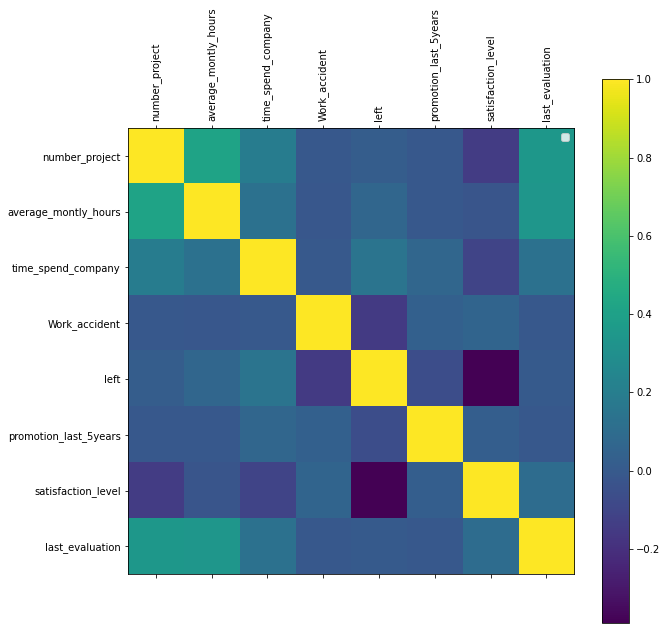

In [30]:
# Generating a Correlation Matrix
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
  corr = df.corr()
  fig, ax = plt.subplots(figsize = (size,size))
  ax.legend()
  cax = ax.matshow(corr)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)),corr.columns, rotation='vertical')
  plt.yticks(range(len(corr.columns)),corr.columns)

plot_corr(final_data)

In [32]:
# Using One HotEncoder to create dummy variables - Categorical Variables
#drop_first removes the first column so as to remove redundancy
categorical = ['department','salary']
final_data = pd.get_dummies(final_data, columns = categorical, drop_first=True)
final_data.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [34]:
# new number of columns
len(final_data.columns)

19

In [35]:
#total number of employees in our data who have left
len(final_data[final_data['left'] == 1])

3571

Dividing dataset into independent and dependent variables

In [0]:
x = final_data.drop(['left'], axis = 1).values

y = final_data['left'].values

Splitting data into Train & Test

In [0]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

Normalize Data

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training a Logistic Regression Model

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train,Y_train)

predictions = model.predict(X_test)

print("Accuracy Score: ", accuracy_score(predictions,Y_test))
print("\nConfusion Matrix: \n" , confusion_matrix(predictions,Y_test))
print("\nClassification Report: \n",classification_report(predictions,Y_test))

Accuracy Score:  0.794

Confusion Matrix: 
 [[3202  667]
 [ 260  371]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.83      0.87      3869
           1       0.36      0.59      0.44       631

    accuracy                           0.79      4500
   macro avg       0.64      0.71      0.66      4500
weighted avg       0.85      0.79      0.81      4500



Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train,Y_train)
predictions = model_rf.predict(X_test)

print("Accuracy Score: {0:.2f}%".format(100*accuracy_score(predictions,Y_test)))
print("\nConfusion Matrix: \n" , confusion_matrix(predictions,Y_test))
print("\nClassification Report: \n",classification_report(predictions,Y_test))

Accuracy Score: 98.93%

Confusion Matrix: 
 [[3450   36]
 [  12 1002]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3486
           1       0.97      0.99      0.98      1014

    accuracy                           0.99      4500
   macro avg       0.98      0.99      0.98      4500
weighted avg       0.99      0.99      0.99      4500



Identify features that are crucial

In [58]:
final_data.drop(['left'], axis = 1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [60]:
feature_importance = pd.DataFrame(model_rf.feature_importances_,
                                  index = pd.DataFrame(X_train).columns,
                                  columns = ['importance']).sort_values('importance',ascending=False)

feature_importance

,importance
5,0.304302
0,0.181015
2,0.180878
1,0.167789
6,0.123074
3,0.009992
16,0.007405
17,0.003870
15,0.003747
13,0.003492
